## Effective Slippage
if $p$ is the effective price and $p_i^j$ is the spot price, we compute effective slippage as
$$
\frac{p}{p_i^j} - 1
$$

Note that $C = \frac{Q_2}{Q_1}$, and $V = \frac{\Delta R_1}{R_1}$.

We get
$$
\frac{1}{V}\frac{C(VR_1 - f_T)(1 - f_P)}{C(R_1 + VR_1 - f_T) + (VR_1 - f_T)(1 - f_P)}(1 - f_A) - 1
$$

### $f_T$ negligible compared to transaction size
$$
\frac{1 - f_P}{1 + V + \frac{V}{C}(1 - f_P)}(1 - f_A) - 1
$$

### $f_P = f_A$
$$
\frac{(1 - f_P)^2}{1 + V + \frac{V}{C}(1 - f_P)} - 1
$$

We are interested in fixing $C$, and looking at how effective slippage changes with $V$ and $f_P = f_A$.

[[-0.00019996 -0.0003999  -0.00059982 ... -0.00957553 -0.00977453
  -0.00997351]
 [-0.00039984 -0.00059973 -0.0007996  ... -0.00977307 -0.00997202
  -0.01017095]
 [-0.00059964 -0.00079948 -0.0009993  ... -0.00997053 -0.01016943
  -0.01036831]
 ...
 [-0.0190308  -0.01922605 -0.01942128 ... -0.02818678 -0.02838113
  -0.02857545]
 [-0.01922322 -0.01941843 -0.01961361 ... -0.02837697 -0.02857127
  -0.02876555]
 [-0.01941557 -0.01961073 -0.01980586 ... -0.02856708 -0.02876133
  -0.02895556]]


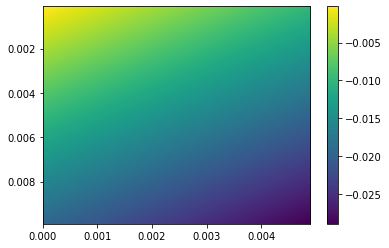

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

# set variables & parameters

C = 1
fee = [0.0001*i for i in range(50)]
V = [0.0001*i for i in range(1,100)]

#create matrix for comparison
m = len(V)
n = len(fee)
slippage = np.ndarray(shape = (m,n), dtype = np.double)

# index matrix
#better_index = ["X1", "X2", "Y1", "Y2", "Y3"]
#matrix.index = better_index

def eff_slippage(V, fee, C):
    return (1 - fee)**2 / (1 + V + V/C*(1 - fee)) - 1

# fill in matrix with calculation results
for i in range(len(V)):
    for j in range(len(fee)):
        slippage[i][j] = eff_slippage(V[i], fee[j], C)




def heatmap2d(arr: np.ndarray):
    plt.imshow(arr, cmap='viridis', aspect='auto', extent=[min(fee),max(fee),max(V), min(V)])
    plt.colorbar()
    plt.show()


print(slippage)
heatmap2d(slippage)

We'd like to solve for $f_P$
$$
s = \frac{(1 - f_P)^2}{1 + V + \frac{V}{C}(1 - f_P)} - 1\\
(s + 1) (1 + V + \frac{V}{C}x)= x^2\\
(s + 1) (1 + V) + (s + 1)\frac{V}{C}x= x^2\\
0 = x^2 - (s + 1)\frac{V}{C}x - (s + 1) (1 + V)\\
$$
Thus
$$
a = 1\\
b = - (s + 1)\frac{V}{C}\\
c = - (s + 1) (1 + V)
$$
So
$$
x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a} = \frac{(s + 1)\frac{V}{C} \pm \sqrt{((s + 1)\frac{V}{C})^2 + 4(s + 1) (1 + V)}}{2}\\
x = \frac{(s + 1)\frac{V}{C} \pm (s + 1)\frac{V}{C}\sqrt{1 + 4\left(\frac{C}{V}\right)^2\frac{(1 + V)}{(s + 1)}}}{2}\\
$$
sign must be plus for $x$ to be positive, so
$$
x = (s + 1)\frac{V}{C}\frac{1 + \sqrt{1 + 4\left(\frac{C}{V}\right)^2\frac{(1 + V)}{(s + 1)}}}{2}\\
f_P = 1 - (s + 1)\frac{V}{C}\frac{1 + \sqrt{1 + 4\left(\frac{C}{V}\right)^2\frac{(1 + V)}{(s + 1)}}}{2}
$$

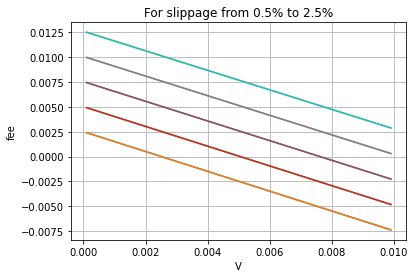

In [2]:
def fee_from_slippage(V, S, C):
    return 1 - V/C * (S+1) * (1 + np.sqrt(1 + 4*(C/V)**2*(1 + V)/(1+S)))/2
def fee_lin(V, S, C):  # approx for when C/V >> 1
    return 1 - V/C * (S+1) * (1 + np.sqrt(4*(C/V)**2*(1 + V)/(1+S)))/2

S = [-0.005*i for i in range(1,6)]
C = 1
fig, ax = plt.subplots()

for s in S:
    
    fee_derived = [fee_from_slippage(v, s, C) for v in V]
    fees_2 = [fee_lin(v, s, C) for v in V]

    ax.plot(V, fee_derived)
    ax.plot(V, fees_2)



ax.set(xlabel='V', ylabel='fee',
       title='For slippage from 0.5% to 2.5%')
ax.grid()
plt.show()

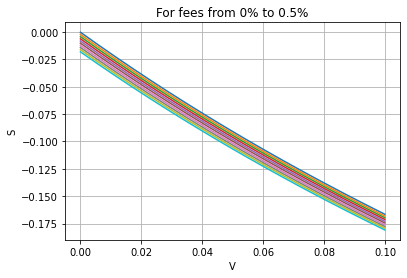

In [16]:

# note that the actual fee is about twice this, so really this ranges from 0 to 0.5% fees, approximately.
fees = [0.001*i for i in range(10)]
V = [0.0001*i for i in range(1,1000)]
C = 1
fig, ax = plt.subplots()

for fee in fees:
    
    S = [eff_slippage(v, fee, C) for v in V]

    ax.plot(V, S)


ax.set(xlabel='V', ylabel='S',
       title='For fees from 0% to 2.0%')
ax.grid()
plt.show()

### $f_T$ negligible compared to transaction size
$$
\frac{1 - f_P}{1 + \frac{\Delta R_1}{R_1} + p_1^Q\frac{\Delta R_1}{Q_2}(1 - f_P)}(1 - f_A) - 1
$$

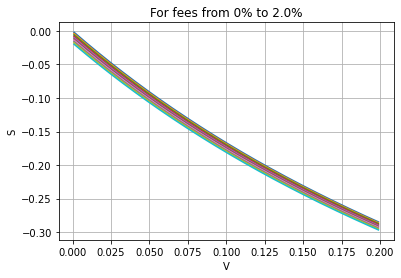

In [42]:
def eff_slippage_R(R, delta_R, fee, C):
    return eff_slippage(delta_R/R, fee, C)
def eff_slippage_scaled_liquidity(R, delta_R, fee_P, fee_A, Q1, Q2, scale):
    p1 = Q1/R
    return (1 - fee_P)/(1 + delta_R/(scale * R) + p1 * delta_R/(scale * Q2) * (1 - fee_P)) * (1 - fee_A) - 1

# note that the actual fee is about twice this, so really this ranges from 0 to 0.5% fees, approximately.
fees = [0.001*i for i in range(10)]
delta_R = 1000
R = 10000
Q2 = 10000
scale_factors = [.01*i for i in range(1,200)]
step_size = .001
V = [step_size*i for i in range(1,int(0.2/step_size))]
C = 1
fig, ax = plt.subplots()

for fee in fees:
    
    S = [eff_slippage_scaled_liquidity(R, delta_R, fee, fee, Q2, Q2, c) for c in scale_factors]
    S = [eff_slippage(v, fee, C) for v in V]

    ax.plot(V, S)


ax.set(xlabel='V', ylabel='S',
       title='For fees from 0% to 2.0%')
ax.grid()
plt.show()

### Uneven pools
$$
\frac{(1 - f_P)(1 - f_A)}{1 + V + \frac{V}{C}(1 - f_P)} - 1\\
\frac{(1 - f_P)(1 - f_A)}{1 + V + K(1 - f_P)} - 1\\
\frac{(1 - f_P)(1 - f_A)}{1 + \frac{\Delta R_1}{R_1} + \frac{p_1^2\Delta R_1}{R_2}(1 - f_P)} - 1
$$
Or letting $V_1 = V = \frac{\Delta R_1}{R_1}$ and $V_2 = \frac{p_1^2\Delta R_1}{R_2}$, we get
$$
\frac{(1 - f_P)(1 - f_A)}{1 + V_1 + V_2(1 - f_P)} - 1
$$
Note that $V$ scales as $\frac{1}{R_1}$ while $K$ scales as $\frac{1}{Q_2}$.

In [ ]:
def eff_slippage_R(R, delta_R, fee, C):
    return eff_slippage(delta_R/R, fee, C)
def eff_slippage_scaled_liquidity(R, delta_R, fee_P, fee_A, Q1, Q2, scale):
    p1 = Q1/R
    return (1 - fee_P)/(1 + delta_R/(scale * R) + p1 * delta_R/(scale * Q2) * (1 - fee_P)) * (1 - fee_A) - 1

# note that the actual fee is about twice this, so really this ranges from 0 to 0.5% fees, approximately.
fees = [0.001*i for i in range(10)]
delta_R = 1000
R = 10000
Q2 = 10000
scale_factors = [.01*i for i in range(1,200)]
step_size = .001
V1 = [step_size*i for i in range(1,int(0.2/step_size))]
V2 = [step_size*i for i in range(1,int(0.2/step_size))]
fee = 0
C = 1
fig, ax = plt.subplots()

for fee in fees:
    
    S = [eff_slippage_scaled_liquidity(R, delta_R, fee, fee, Q2, Q2, c) for c in scale_factors]
    S = [eff_slippage(v, fee, C) for v in V]

    ax.plot(V, S)


ax.set(xlabel='V', ylabel='S',
       title='For fees from 0% to 2.0%')
ax.grid()
plt.show()

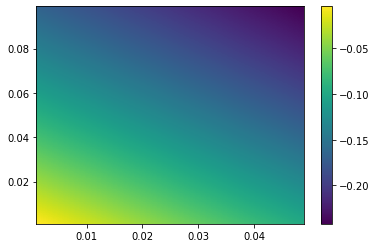

In [56]:
C = 1
fee = 0
V1_max = 0.1
V2_max = 0.05
step_size = 0.001
V1 = [step_size*i for i in range(1,int(V1_max/step_size))]
V2 = [step_size*i for i in range(1,int(V2_max/step_size))]
V1.reverse()

#create matrix for comparison
m = len(V1)
n = len(V2)
slippage = np.ndarray(shape = (m,n), dtype = np.double)

# index matrix
#better_index = ["X1", "X2", "Y1", "Y2", "Y3"]
#matrix.index = better_index

def eff_slippage_2(V1, V2, fee, C):
    return (1 - fee)**2 / (1 + V1 + V2*(1 - fee)) - 1

# fill in matrix with calculation results
for i in range(len(V1)):
    for j in range(len(V2)):
        slippage[i][j] = eff_slippage(V1[i], V2[j], C)




def heatmap2d(arr: np.ndarray):
    plt.imshow(arr, cmap='viridis', aspect='auto', extent=[min(V2), max(V2),min(V1),max(V1)])
    plt.colorbar()
    plt.show()


heatmap2d(slippage)

Note that
$$
S_1 = \frac{\partial S}{\partial R_1} = \frac{(1 - f_P)(1 - f_A) \left(-\frac{\Delta R_1}{R_1^2}\right)}{\left(1 + \frac{\Delta R_1}{R_1} + p_1^2 \frac{\Delta R_1}{R_2}(1 - f_P)\right)^2}\\
S_2 = \frac{\partial S}{\partial R_2} = \frac{(1 - f_P)^2(1 - f_A) \left(-\frac{p_1^2\Delta R_1}{R_2^2}\right)}{\left(1 + \frac{\Delta R_1}{R_1} + p_1^2 \frac{\Delta R_1}{R_2}(1 - f_P)\right)^2}\\
$$
Thus
$$
\frac{S_2}{S_1} = (1 - f_P) p_1^2\left(\frac{R_1}{R_2}\right)^2
$$

Conclusion is that we need to incentivize liquidity in smaller pools.

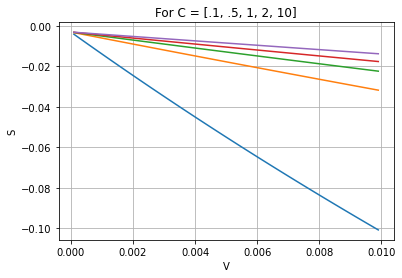

In [13]:

def eff_slippage_k(V, fee, K):
    return eff_slippage(V, fee, V/K)

# note that the actual fee is about twice this, so really this ranges from 0 to 0.5% fees, approximately.
fee = 0.0015
V = [0.0001*i for i in range(1,100)]
K = [0.1, 0.5, 1, 2, 10]
fig, ax = plt.subplots()

for k in K:
    
    S = [eff_slippage_k(v, fee, c) for v in V]

    ax.plot(V, S)


ax.set(xlabel='V', ylabel='S',
       title='For C = [.1, .5, 1, 2, 10]')
ax.grid()
plt.show()